## Урок 7
### Линейная регрессия. Однофакторный дисперсионный анализ
### Домашнее задание

#### Задача 1

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

    Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
    Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
    Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
    Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
    Постройте для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

Считаем выборочное среднее:

In [2]:
x_mean = x.mean()
y_mean = y.mean()
x_mean, y_mean

(101.4, 709.9)

Считаем дисперсию:

In [3]:
s_x = x.std(ddof=1)
s_y = y.std(ddof=1)
s_x, s_y

(62.31318747531162, 183.99544076477068)

Считаем ковариацию для парной регрессии:
$\large b_{1} = \frac{\sigma_{xy}}{\sigma^2_x}, b_{0} = \overline{y} - b_1\overline{x}$

In [4]:
r = np.cov(x, y, ddof=1)[1, 0]
r

10175.377777777776

Находим коэффициенты:

In [5]:
b1 = r / (s_x ** 2)
b0 = y_mean - b1 * x_mean
b0, b1

(444.1773573243596, 2.620538882402765)

Получаем уравнение линейной регрессии:
y = 444.1774 + 2.6205

Проверим:

In [7]:
a = np.vstack([x, np.ones(len(x))]).T
a

array([[ 35.,   1.],
       [ 45.,   1.],
       [190.,   1.],
       [200.,   1.],
       [ 40.,   1.],
       [ 70.,   1.],
       [ 54.,   1.],
       [150.,   1.],
       [120.,   1.],
       [110.,   1.]])

In [8]:
b1, b0 = np.linalg.lstsq(a, y, rcond=None)[0]
b0, b1

(444.1773573243597, 2.620538882402765)

Похожие коэффициенты. Это хорошо.

Нарисуем график:

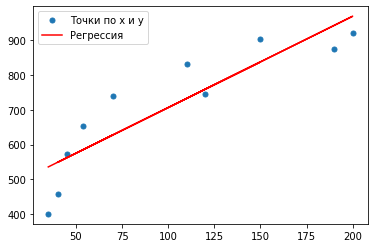

In [12]:
plt.plot(x, y, 'o', label='Точки по x и y', markersize=5)
plt.plot(x, b1 * x + b0, 'r', label='Регрессия')
plt.legend()
plt.show()

Теперь считаем коэффициент детерминации: $\large R^2 = r_{xy}^2$ 

In [31]:
z = b0 + b1 * x
z

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [32]:
r = np.corrcoef(x, y)
r

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

In [33]:
R = r[0, 1] ** 2
R

0.7876386635293682

Считаем среднюю ошибку апроксимации:

In [34]:
apr_mean = 1 / len(y) * sum(abs(z / y))
apr_mean

1.0214965927610289

Оценим значимость уравнения регрессии с помощью F-критерия Фишера. Надежность равна 0.95.

In [35]:
from scipy.stats import f, t

k1 = 1
k2 = len(x) - k1 - 1
F = (R / k1) / ((1 - R) / k2)
F_crit = f.ppf(0.95, 1, len(x) - 2)
F, F_crit

(29.671640859664432, 5.317655071578714)

Итого $F > F_{crit}$. Уравнение считаем значимым.

Построим доверительные интервалы для коэффициентов регрессии. Найдем $\large S_{slope} = \sqrt{\frac{\frac{1}{n-2}\sum\limits_{i=1}^{n} (y_i - z_i)^2}{\sum\limits_{i=1}^{n} (x_i - \overline{x})^2}}$

In [36]:
s_slope = ((1 / (len(z) - 2) * sum((y - z) ** 2)) / (sum((x - x_mean) ** 2))) ** 0.5
s_slope

0.48108279568516005

Статистика $\large T=\frac{\widehat{b_1} - b_1}{S_{slope}}$ имеет t-распределение с n−2 степенями свободы, откуда можем найти доверительные интервалы для b1. Надежность равна 0.95.

In [37]:
alpha = 0.05
t1, t2 = t.ppf(alpha / 2, k2), t.ppf(1 - alpha / 2, k2)
t1, t2

(-2.306004135033371, 2.3060041350333704)

Доверительный интервал для b1:

In [39]:
b1 + t1 * s_slope, b1 + t2 * s_slope

(1.5111599662593715, 3.729917798546158)

Теперь доверительный интервал для b0
($\large S_{intercept} = S_{slope} \sqrt{\frac{1}{n}\sum\limits_{i=1}^{n}x_i^2}$)

In [40]:
s_intercept = s_slope * (x ** 2).mean() ** .5
s_intercept

56.46649755068153

In [41]:
b0 + t1 * s_intercept, b0 + t2 * s_intercept

(313.96538048163643, 574.389334167083)

#### Задача 3

Квартет Энскомба — популярный в области анализа данных пример наборов данных, у которых практически совпадают все статистические свойства (средние, дисперсии, коэффициенты корреляции, регрессионные линии), однако, существенно отличаются графики. Данный пример призван показать, насколько важна визуализация данных. Датасет представляет собой 4 пары выборок:

"x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],  
"y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],  
"x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],  
"y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],  
"x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],  
"y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],  
"x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],  
"y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]  

По каждой паре выборок посчитайте:

    выборочное среднее и дисперсию каждой выборки,
    коэффициент корреляции Пирсона и прямую линейной регрессии.

Убедившись в том, что они практически не отличаются, постройте scatter plot по каждой паре выборок.

In [42]:
data = {
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}

In [48]:
def xy(z_1: list, z_2: list):
    x = np.array(z_1)
    y = np.array(z_2)
    x_mean, y_mean, std_x, std_y = x.mean(), y.mean(), x.std(), y.std()
    r = np.corrcoef(x, y)[0, 1]
    print(f'Выборочное среднее x={x_mean}, выборочное среднее y={y_mean}, дисперсия x={std_x}, дисперсия y={std_y}')
    print(f'r={r}')
    b1 = r / (std_x ** 2)
    b0 = y_mean - b1 * x_mean
    
    plt.plot(x, y, 'o', label='Точки выборки', markersize=5)
    plt.plot(x, b1 * x + b0, 'r', label='Регрессия')
    plt.legend()
    plt.show()

Выборочное среднее x=9.0, выборочное среднее y=7.500909090909093, дисперсия x=3.1622776601683795, дисперсия y=1.937024215108669
r=0.81642051634484


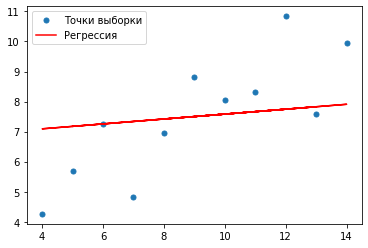

In [50]:
x, y = data['x1'], data['y1']
xy(x, y)

Выборочное среднее x=9.0, выборочное среднее y=7.50090909090909, дисперсия x=3.1622776601683795, дисперсия y=1.93710869148962
r=0.8162365060002428


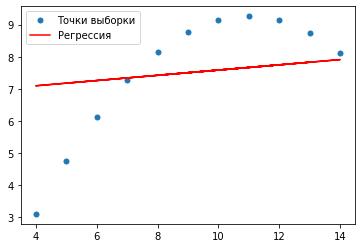

In [51]:
x, y = data['x2'], data['y2']
xy(x, y)

Выборочное среднее x=9.0, выборочное среднее y=7.5, дисперсия x=3.1622776601683795, дисперсия y=1.9359329439927313
r=0.8162867394895984


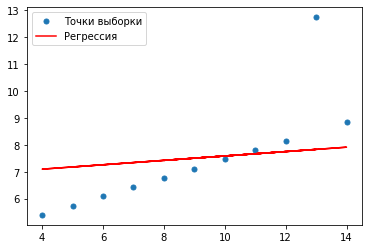

In [52]:
x, y = data['x3'], data['y3']
xy(x, y)

Выборочное среднее x=9.0, выборочное среднее y=7.500909090909091, дисперсия x=3.1622776601683795, дисперсия y=1.9360806451340837
r=0.8165214368885028


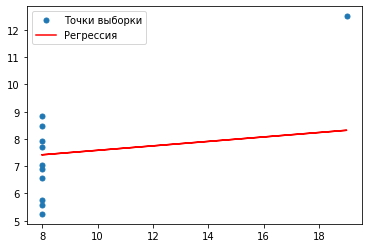

In [53]:
x, y = data['x4'], data['y4']
xy(x, y)

Не ожидал!!!